### 03-03-2012: Riometer absorption, foEs, hEs vs time

### Open ionosonde data file

In [2]:
## Import stuff
import datetime
import numpy as np

# Define timestamp array
timestamp_full = []

# Minimum virtual height of Es trace
hEs = []
timestamp_hEs = []

# Define CS array
CS = []

# Es layer critical frequency
foEs = []
timestamp_foEs = []


# Define filename
filename = "GD 03-03-2012.txt"

# define indices for each parameter of file
time_idx = 0
CS_idx = 1
foEs_idx = 2
hEs_idx = 8

# Define format for datetime
format = "%Y-%m-%dT%H:%M:%S.%fZ"

# Open file - read
fp = open(filename, 'r')
# Read every line in file
for line in fp:
# Skip comments
    if line[0] == "#":
        continue
# Strip lines
    else:
        line_strip = line.strip()
# Split lines into lists
        line_split = line.split()

        foEs_str = line_split[foEs_idx]
        hEs_str = line_split[hEs_idx]

        timestamp_full.append(datetime.datetime.strptime(line_split[time_idx], format))
        
    
        # Check if can convert foEs to float
        try:
            foEs_float = float(foEs_str)
            # If successful, append to the array
            foEs.append(foEs_float)
            # Extract timestamp and append to the array
            timestamp_str = line_split[time_idx]
            timestamp_foEs.append(datetime.datetime.strptime(timestamp_str, format))
        except ValueError:
            # If the conversion fails, ignore the line
            pass

        # Check if hEs can convert to float
        try:
            hEs_float = float(hEs_str)
            # If successful, append to the array
            hEs.append(hEs_float)
            # Extract timestamp and append to the array
            timestamp_strhEs = line_split[time_idx]
            timestamp_hEs.append(datetime.datetime.strptime(timestamp_strhEs, format))
        except ValueError:
            # If the conversion fails, ignore the line
            pass



#print("Number of hE height data lines:", len(hE))
print("Number of foEs data lines:", len(foEs))
print("Number of timestamp_foEs data lines:", len(timestamp_foEs))
print("Number of hEs data lines:", len(hEs))
print("Number of timestamp_hEs data lines:", len(timestamp_hEs))
print("Number of FULL timestamp data lines: ", len(timestamp_full))

# Close file
fp.close()

Number of foEs data lines: 117
Number of timestamp_foEs data lines: 117
Number of hEs data lines: 117
Number of timestamp_hEs data lines: 117
Number of FULL timestamp data lines:  130


### Open riometer data file

In [3]:
import datetime

# Define lists
date = [] #do i even need the date cause it's the same year?
time = []
absorption = []
raw_sig = []

# Define filename
filename = "RD 2012-03-03.txt"

# open file to read
fp = open(filename, 'r')

# Define "line" to skip last line cause it's 24:00:02 which doesn't make sense
#line = fp.readline()
#line = line[:-1]

for line in fp:
    # skip comments
    if line[0] == "#" or line[27] == "N" or line[23] == "*":
        continue
    else:
        #print(line)
        # strip line
        line_strip = line.strip()
        # split lines into lists
        line_split = line.split()

        # Define datetime format for time
        format = "%d-%m-%YT%H:%M:%S"

        '''datetime_str = "03-03-2012T" + line_split[1]
        absorption.append(float(line_split[2]))
        this_time = datetime.datetime.strptime(datetime_str, format)
        #this_day = datetime.datetime.strptime(line_split[0], format_day)
        time.append(this_time)
        raw_sig.append(float(line_split[3]))'''
        # Try-except to see if can convert to datetime
        try:
            datetime_str = "03-03-2012T" + line_split[1]
            absorption.append(float(line_split[2]))
            # Only append line to list if time checks true
            res = bool(datetime.datetime.strptime(datetime_str, format))
            #resday = bool(datetime.datetime.strptime(line_split[0], format_day))
            this_time = datetime.datetime.strptime(datetime_str, format)
            #this_day = datetime.datetime.strptime(line_split[0], format_day)
            time.append(this_time)

            #map(' '.join, zip(tim, time))
    
            # append raw signals to array
            raw_sig.append(float(line_split[3]))
            
        except ValueError:
            res = False

print("length of time list:", len(time))
print("length of absp list:", len(absorption))
print("length of raw sig list:", len(raw_sig))


print("Absorption at 500th index: ", absorption[500])
print("Min absp: ", min(absorption))
print("Max absp: ", max(absorption))

fp.close()

length of time list: 17141
length of absp list: 17141
length of raw sig list: 17141
Absorption at 500th index:  0.733
Min absp:  -1.524
Max absp:  154.258


### Plot

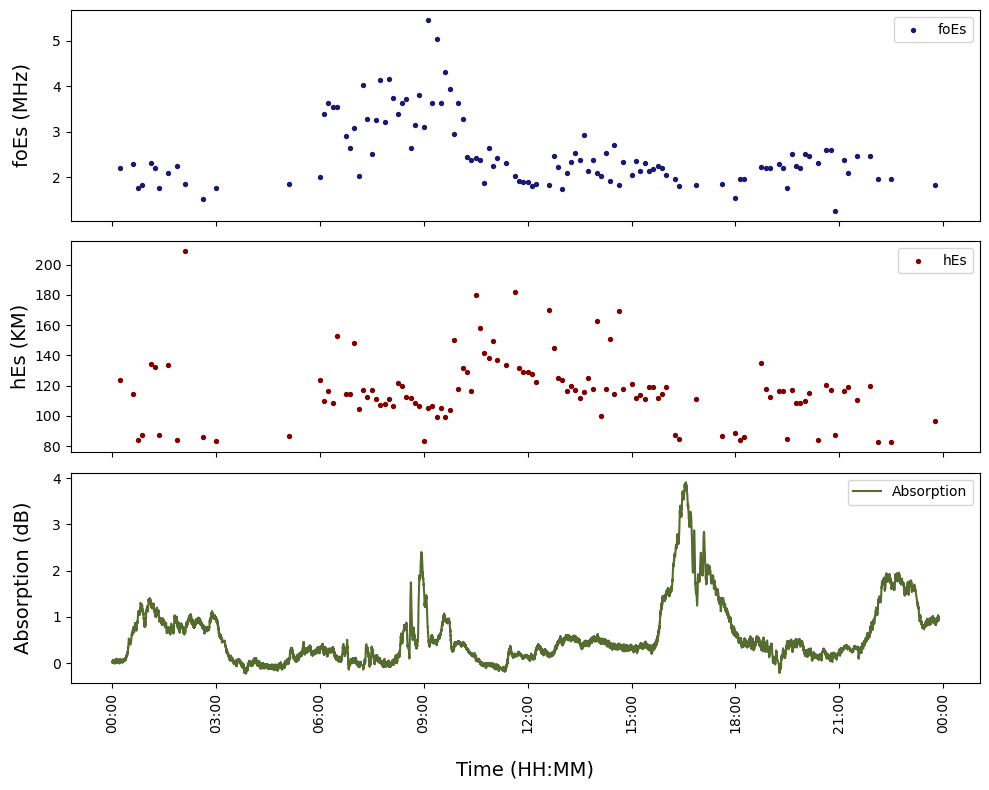

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates


# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Plot foEs on the first subplot
ax1.scatter(timestamp_foEs, foEs, label='foEs', color='midnightblue', s=8)
ax1.set_ylabel('foEs (MHz)', fontsize = 14, color='black', labelpad = 15) # labelpad aligns all y labels
ax1.tick_params('y', colors='black')
ax1.legend()

# Plot hEs on the second subplot
ax2.scatter(timestamp_hEs, hEs, label='hEs', color='maroon', s=8)
ax2.set_ylabel('hEs (KM)', fontsize = 14, color='black')
ax2.tick_params('y', colors='black')
ax2.legend()


# To get the correct riometer graph
def filter_spikes(ax, times, absorptions, threshold, neighbor_count=10):
    """
    Filter out absorption spikes where the value is greater than a threshold relative to the average of its neighbors.
    """
    filtered_times = []
    filtered_absorptions = []

    for i in range(len(absorptions)):
        # Determine the range for neighbors
        start_index = max(i - neighbor_count, 0)
        end_index = min(i + neighbor_count + 1, len(absorptions))

        # Calculate the average of neighboring values
        neighbor_avg = sum(absorptions[start_index:end_index]) / (end_index - start_index)

        # Check if the current value is within the threshold relative to the neighbor average
        if abs(absorptions[i] - neighbor_avg) <= threshold:
            filtered_times.append(times[i])
            filtered_absorptions.append(absorptions[i])

    # Plot on the provided axis
    ax.plot(filtered_times, filtered_absorptions, label="Absorption", linestyle = "-", color="darkolivegreen")
    #ax.set_title("03/03/2012 Riometer absorption (dB) vs time (UTC H:M:S) with threshold 0.06")
    ax.set_xlabel("Time (UTC) H:M:S", fontsize=14)
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylabel("Absorption (dB)", fontsize=14)

threshold = 0.06

# Plot absorption on the third subplot
filter_spikes(ax3, time, absorption, threshold, neighbor_count=10)
ax3.set_ylabel('Absorption (dB)', color='black', labelpad = 14) # labelpad aligns all y labels
ax3.tick_params('y', colors='black')
ax3.legend()

# Format x-axis labels to show only HH:MM
date_formatter = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_formatter)

# Set common x-axis label and title
plt.xlabel('Time (HH:MM)', fontsize = 14, labelpad = 20)
#plt.suptitle("foEs (MHz), hEs (KM), and Absorption (dB) vs Time (HH:MM) for One Day of Data (03/03/2012)", y=1)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
